Class Distribution in training data before augmentation

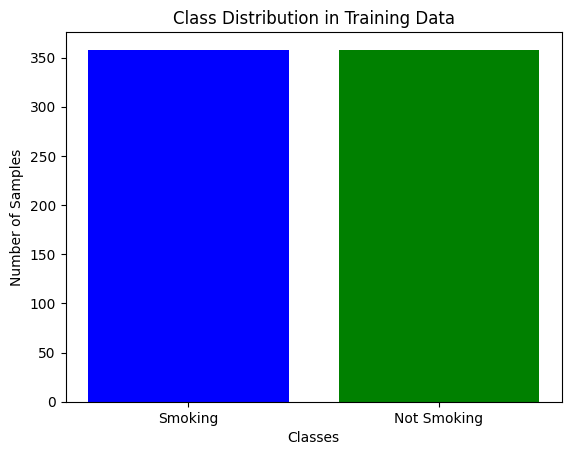

In [2]:
import os
import matplotlib.pyplot as plt

# Define the correct path to the train dataset
train_dir = 'dataset/train'

# Get the sizes of the classes
smoking_class_size = len(os.listdir(os.path.join(train_dir, 'smoking')))
notsmoking_class_size = len(os.listdir(os.path.join(train_dir, 'notsmoking')))

# Prepare data for the bar chart
classes = ['Smoking', 'Not Smoking']
sizes = [smoking_class_size, notsmoking_class_size]

# Create the bar chart
plt.bar(classes, sizes, color=['blue', 'green'])

# Adding labels and title
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Data')

# Display the chart
plt.show()


Augmentation

In [ ]:
import os
import numpy as np
from PIL import Image, ImageFilter

# Add salt and pepper noise
def add_salt_and_pepper_noise(image, amount=0.04, salt_vs_pepper=0.5):
    """Add salt-and-pepper noise to an image."""
    image = image.convert('RGB')
    img_array = np.array(image)
    h, w = img_array.shape[:2]
    num_salt = int(amount * h * w * salt_vs_pepper)
    num_pepper = int(amount * h * w * (1 - salt_vs_pepper))

    # Add salt (white)
    coords = [np.random.randint(0, i - 1, num_salt) for i in img_array.shape[:2]]
    img_array[coords[0], coords[1]] = 255

    # Add pepper (black)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in img_array.shape[:2]]
    img_array[coords[0], coords[1]] = 0

    return Image.fromarray(img_array)

# Add Gaussian blur
def add_gaussian_blur(image, radius=2):
    return image.filter(ImageFilter.GaussianBlur(radius))

# Add Gaussian noise
def add_gaussian_noise(image, mean=0, std=0.05):
    """Add Gaussian noise to an image."""
    image = image.convert('RGB')
    img_array = np.array(image) / 255.0  # Normalize to [0, 1]
    noise = np.random.normal(mean, std, img_array.shape)
    noisy_img_array = img_array + noise
    noisy_img_array = np.clip(noisy_img_array, 0, 1)  # Ensure values are between 0 and 1
    return Image.fromarray((noisy_img_array * 255).astype(np.uint8))


train_dir = 'dataset/train'

# Function to augment a single image and save the results
def augment_and_save_images(image_path, save_folder):
    image = Image.open(image_path)

    # Apply salt and pepper noise
    noisy_image = add_salt_and_pepper_noise(image)
    noisy_image_name = f"{os.path.splitext(os.path.basename(image_path))[0]}_noisy.jpg"
    noisy_image.save(os.path.join(save_folder, noisy_image_name))

    # Apply Gaussian blur
    blurred_image = add_gaussian_blur(image)
    blurred_image_name = f"{os.path.splitext(os.path.basename(image_path))[0]}_blurred.jpg"
    blurred_image.save(os.path.join(save_folder, blurred_image_name))

    # Apply Gaussian noise
    gaussian_noise_image = add_gaussian_noise(image)
    gaussian_noise_name = f"{os.path.splitext(os.path.basename(image_path))[0]}_gaussian_noise.jpg"
    gaussian_noise_image.save(os.path.join(save_folder, gaussian_noise_name))


smoking_folder = os.path.join(train_dir, 'smoking')
notsmoking_folder = os.path.join(train_dir, 'notsmoking')


for folder in [smoking_folder, notsmoking_folder]:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)

        # Skip non-image files
        if not image_name.lower().endswith(('png', 'jpg', 'jpeg')):
            continue

        # Augment and save the images
        augment_and_save_images(image_path, folder)


Class Distribution in training data after augmentation

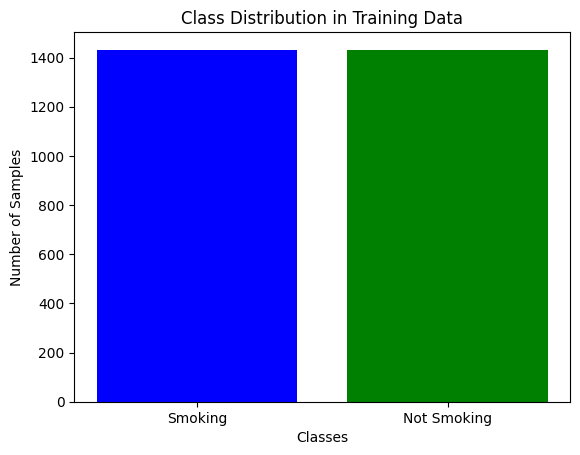

In [ ]:

train_dir = 'dataset/train'

# Get the sizes of the classes
smoking_class_size = len(os.listdir(os.path.join(train_dir, 'smoking')))
notsmoking_class_size = len(os.listdir(os.path.join(train_dir, 'notsmoking')))

classes = ['Smoking', 'Not Smoking']
sizes = [smoking_class_size, notsmoking_class_size]

plt.bar(classes, sizes, color=['blue', 'green'])

plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Data')

plt.show()
